In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

# Exploratory Data Analysis(EDA)

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\59\\DataCoSupplyChainDataset.csv",encoding= 'unicode_escape')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Variable Identification

In [4]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [6]:
df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
df.describe(include='all')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,...,24840.000000,180519.000000,180519.000000,0.0,180519,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,...,NaN,NaN,NaN,NaN,118,118,NaN,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,...,NaN,NaN,NaN,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,NaN,NaN,2/23/2016 0:28,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,...,NaN,NaN,NaN,NaN,24515,24515,NaN,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,...,55426.132327,692.509764,31.851451,NaN,NaN,NaN,141.232550,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,...,31919.279101,336.446807,15.640064,NaN,NaN,NaN,139.732492,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,...,1040.000000,19.000000,2.000000,NaN,NaN,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.379997,NaN,0.000000,18.000000,NaN,NaN,...,23464.000000,403.000000,18.000000,NaN,NaN,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990005,NaN,1.000000,29.000000,NaN,NaN,...,59405.000000,627.000000,29.000000,NaN,NaN,NaN,59.990002,0.0,NaN,NaN
75%,NaN,5.000000,4.000000,64.800003,247.399994,NaN,1.000000,45.000000,NaN,NaN,...,90008.000000,1004.000000,45.000000,NaN,NaN,NaN,199.990005,0.0,NaN,NaN


In [9]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [10]:
print(df.columns)
df.drop(["Order Zipcode","Product Description","Product Status"],axis=1)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Eastern Asia,Shanghái,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Eastern Asia,Osaka,COMPLETE,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Oceania,Australia del Sur,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Oceania,Australia del Sur,PENDING_PAYMENT,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/18/2016 20:18,Standard Class


In [11]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [12]:
df.shape

(180519, 53)

# Univariate Analysis

In [13]:
df.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [14]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [15]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [16]:
df['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

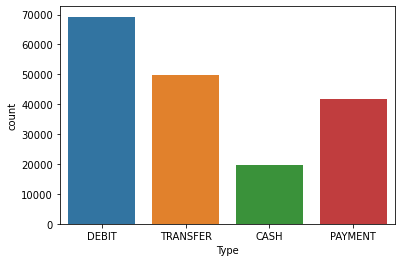

In [17]:
sns.countplot(df['Type'])

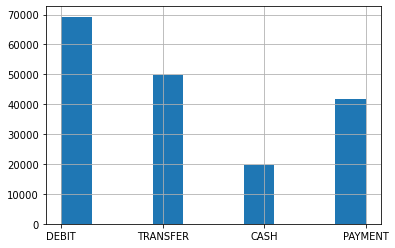

In [18]:
df['Type'].hist()

In [19]:
df['Days for shipping (real)'].unique()

array([3, 5, 4, 2, 6, 0, 1], dtype=int64)

In [20]:
df['Days for shipment (scheduled)'].unique()

array([4, 1, 2, 0], dtype=int64)

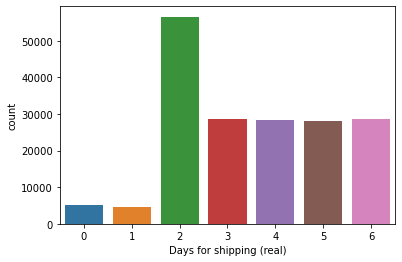

In [21]:
sns.countplot(df['Days for shipping (real)'])

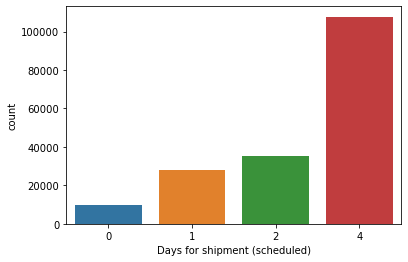

In [22]:
sns.countplot(df['Days for shipment (scheduled)'])

In [23]:
df['Benefit per order'].unique()

array([  91.25     , -249.0899963, -247.7799988, ..., -103.9700012,
       -237.5899963, -337.1000061])

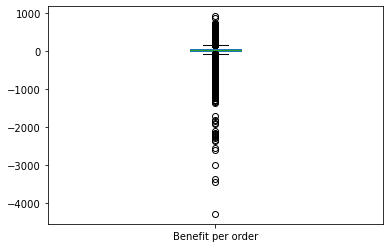

In [24]:
df['Benefit per order'].plot(kind='box')

In [25]:
df['Sales per customer'].unique()

array([314.6400146, 311.3599854, 309.7200012, ..., 298.769989 ,
       403.7099915, 474.7600098])

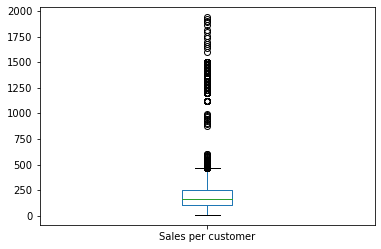

In [26]:
df['Sales per customer'].plot(kind='box')

In [27]:
df['Delivery Status'].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

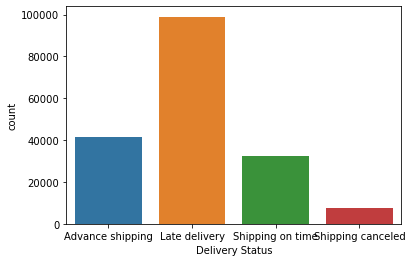

In [28]:
sns.countplot(df['Delivery Status'])


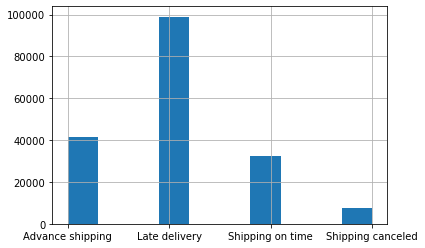

In [29]:
df['Delivery Status'].hist()

In [30]:
df['Late_delivery_risk'].unique()

array([0, 1], dtype=int64)

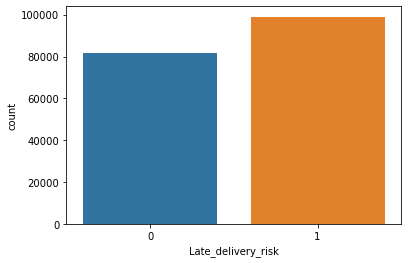

In [31]:
sns.countplot(df['Late_delivery_risk'])

In [32]:
df['Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46],
      dtype=int64)

In [33]:
df['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

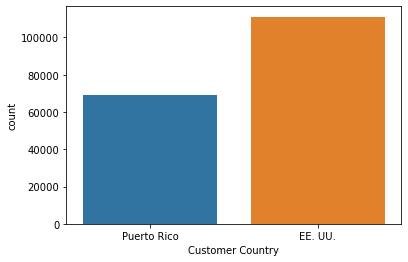

In [34]:
sns.countplot(df['Customer Country'])

In [35]:
df['Department Id'].unique()

array([ 2,  4,  5,  3,  6,  7, 10,  8,  9, 11, 12], dtype=int64)

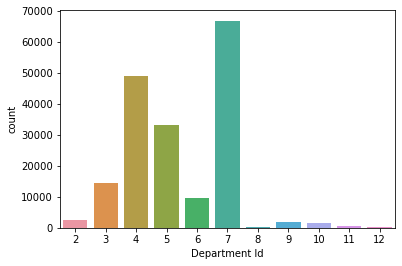

In [36]:
sns.countplot(df['Department Id'])

In [37]:
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [38]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

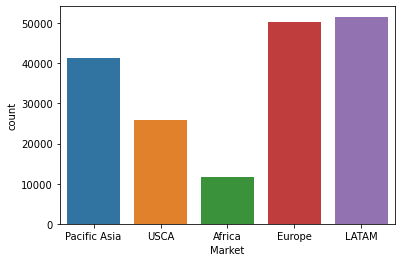

In [39]:
sns.countplot(df['Market'])

In [40]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


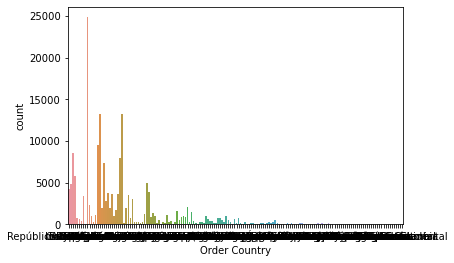

In [41]:
sns.countplot(df['Order Country'])

In [42]:
df['Order Item Discount'].unique()

array([ 13.10999966,  16.38999939,  18.03000069, ..., 140.        ,
        33.65999985,  61.18999863])

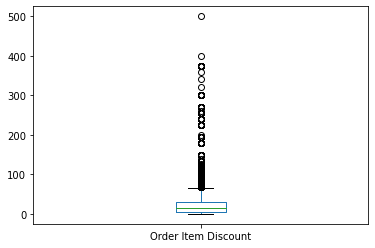

In [43]:
df['Order Item Discount'].plot(kind='box')

As shown in the Box plot above, there are Outliers in the column 'Order Item Discount'.So,we will remove them later

In [44]:
df['Order Item Discount Rate'].describe()

count    180519.000000
mean          0.101668
std           0.070415
min           0.000000
25%           0.040000
50%           0.100000
75%           0.160000
max           0.250000
Name: Order Item Discount Rate, dtype: float64

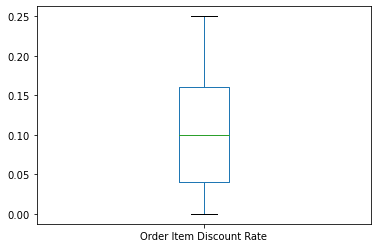

In [45]:
df['Order Item Discount Rate'].plot(kind='box')

In [46]:
df['Order Item Discount Rate'].describe()

count    180519.000000
mean          0.101668
std           0.070415
min           0.000000
25%           0.040000
50%           0.100000
75%           0.160000
max           0.250000
Name: Order Item Discount Rate, dtype: float64

In [47]:
df['Order Item Product Price'].unique()

array([ 327.75      ,   59.99000168,   39.99000168,   50.        ,
         44.99000168,   54.97000122,   99.98999786,   21.98999977,
         31.98999977,   30.        ,   47.99000168,   89.98999786,
         29.98999977,  129.9900055 ,  299.980011  ,  252.8800049 ,
        452.0400085 , 1500.        ,  999.9899902 ,   79.98999786,
         25.        ,   24.98999977,   15.98999977,  215.8200073 ,
        461.480011  ,  210.8500061 ,   34.99000168,   27.98999977,
         70.        ,   19.98999977,   51.99000168,  399.9899902 ,
        299.9899902 ,  357.1000061 ,   59.08000183,  199.        ,
        399.980011  ,   31.07999992,  109.9499969 ,  164.3800049 ,
         11.28999996,   94.98999786,   17.98999977,   99.        ,
        532.5800171 ,   22.        ,  149.9900055 ,  199.9900055 ,
         84.40000153,  293.0400085 ,  249.9900055 ,  260.6499939 ,
         39.75      ,   99.94999695,  329.9899902 ,  159.9900055 ,
        599.9899902 ,  189.        ,  124.9899979 , 1999.98999

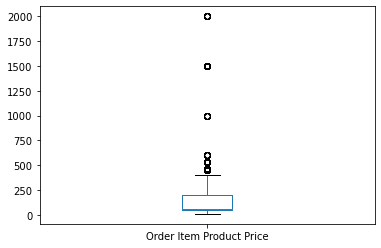

In [48]:
df['Order Item Product Price'].plot(kind='box')

In [49]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

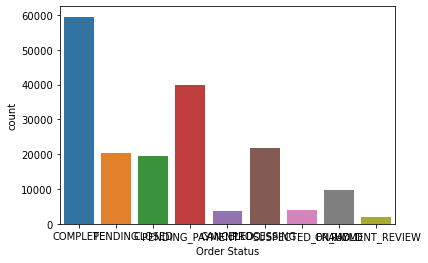

In [50]:
sns.countplot(df['Order Status'])

In [51]:
df['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

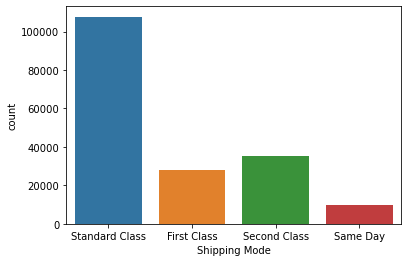

In [52]:
sns.countplot(df['Shipping Mode'])

In [53]:

df['Late_delivery_risk']=df['Late_delivery_risk'].astype(np.object)
df['Late_delivery_risk']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Late_delivery_risk, Length: 180519, dtype: object

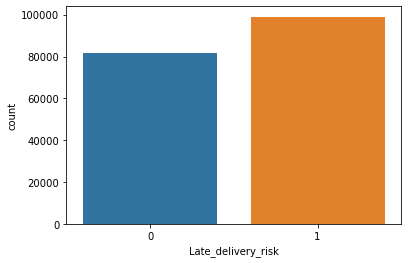

In [54]:
sns.countplot(df['Late_delivery_risk'])

In [55]:
df['Order Id'].unique()

array([77202, 75939, 75938, ..., 26383, 26327, 26118], dtype=int64)

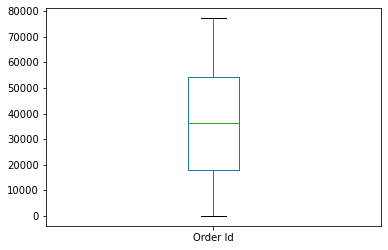

In [56]:
df['Order Id'].plot(kind='box')

In [57]:
df['Order Customer Id'].unique()

array([20755, 19492, 19491, ..., 18579, 16244,  2677], dtype=int64)

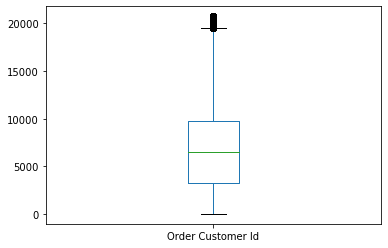

In [58]:
df['Order Customer Id'].plot(kind='box')

In [59]:
df['Customer Zipcode'].unique()

array([  725., 95125., 90027., 14150., 33162., 94583., 11520., 93905.,
        1960.,   729., 90723., 60056., 90813., 95670., 59102., 18702.,
       48066., 90706., 60187., 48238., 75220., 17013., 75228., 19702.,
       91402., 30318., 94539., 14609., 75211.,   957.,   784.,   795.,
       20744., 93304., 11368., 45238., 20874., 75006., 77093., 90023.,
       96706.,  8701., 13440., 92083., 76106., 54935., 19139., 91764.,
       32765., 14221., 96822., 92056., 14120., 93611., 11434., 62040.,
        2155., 91766., 85281., 92703., 17402., 80010., 93065., 20904.,
       55124., 78201., 19143., 19149., 10466., 27858.,  7960., 92115.,
       93030., 33147., 87111., 79109., 33549., 97701.,  8816., 29720.,
       91762., 77015., 23666., 10016., 93257., 97223., 44136., 79927.,
       78840., 84010., 98031., 60620.,  2360., 11691., 77088., 19124.,
       48227., 92840., 92105., 60609., 92870., 95148., 44060., 95051.,
        7083., 90805., 92683., 33068., 91702., 33324.,  8540.,  8861.,
      

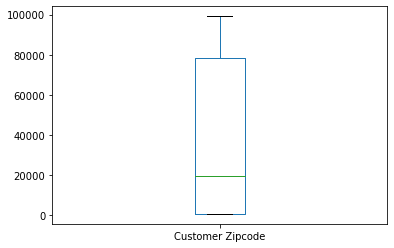

In [60]:
df['Customer Zipcode'].plot(kind='box')

In [61]:
df['Latitude'].unique()

array([18.2514534 , 18.27945137, 37.29223251, ..., 18.24048233,
       18.26129723, 18.24248505])

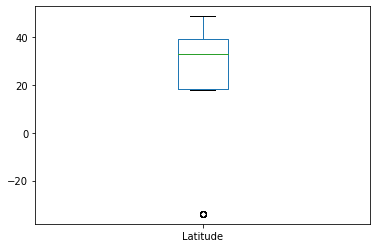

In [62]:
df['Latitude'].plot(kind='box')

In [63]:
df['Longitude'].unique()

array([ -66.03705597,  -66.0370636 , -121.881279  , ..., -117.8856812 ,
        -87.69457245,  -66.54897308])

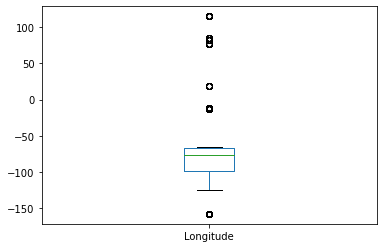

In [64]:
df['Longitude'].plot(kind='box')

In [65]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                object
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [66]:
df['Product Price'].unique()

array([ 327.75      ,   59.99000168,   39.99000168,   50.        ,
         44.99000168,   54.97000122,   99.98999786,   21.98999977,
         31.98999977,   30.        ,   47.99000168,   89.98999786,
         29.98999977,  129.9900055 ,  299.980011  ,  252.8800049 ,
        452.0400085 , 1500.        ,  999.9899902 ,   79.98999786,
         25.        ,   24.98999977,   15.98999977,  215.8200073 ,
        461.480011  ,  210.8500061 ,   34.99000168,   27.98999977,
         70.        ,   19.98999977,   51.99000168,  399.9899902 ,
        299.9899902 ,  357.1000061 ,   59.08000183,  199.        ,
        399.980011  ,   31.07999992,  109.9499969 ,  164.3800049 ,
         11.28999996,   94.98999786,   17.98999977,   99.        ,
        532.5800171 ,   22.        ,  149.9900055 ,  199.9900055 ,
         84.40000153,  293.0400085 ,  249.9900055 ,  260.6499939 ,
         39.75      ,   99.94999695,  329.9899902 ,  159.9900055 ,
        599.9899902 ,  189.        ,  124.9899979 , 1999.98999

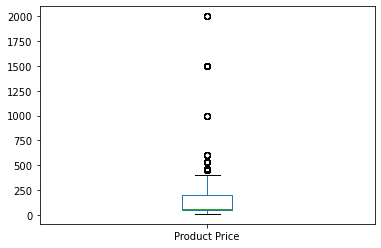

In [67]:
df['Product Price'].plot(kind='box')

In [68]:
df['Product Card Id'].unique()

array([1360,  365,  627,  502,  278,  249,  191,  917,  828,  642,  818,
        825,  306,  977,   44,  251,  403,  957, 1352, 1349, 1351,   60,
         24,  567,  893,  924,  905,  564,  885, 1363, 1353, 1357,  906,
        886,  926,  116,  235,  273,  282,  359,  565,  572,  804,  822,
        835,  276,  823,  203,  364, 1350,  897,   37,  172,  810,  821,
         93, 1347,  305, 1004, 1346,   58,  311,  303, 1354, 1348,   78,
        258,  797,  981, 1355,  135,  134,  845,  982,  625, 1359, 1356,
        607, 1358, 1362,  295,  127,   61,   35,  858,  860,  216,   19,
        226,  208,  793,  792,  786,  778,  777,  775,  773,  771,  768,
        743,  730,  728,  725,  724,  715,  705,  703,  691,  677,  671,
        666,  652,  647,  646, 1361, 1073, 1059, 1014], dtype=int64)

In [69]:
df['Product Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46],
      dtype=int64)

In [70]:
df['Order Item Quantity'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

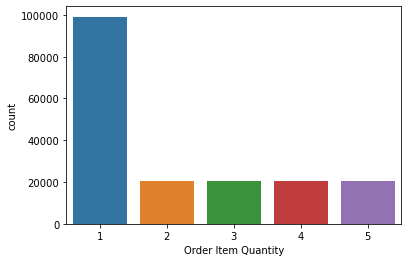

In [71]:
sns.countplot(df['Order Item Quantity'])

In [72]:
df['Sales'].unique()

array([ 327.75      ,  119.9800034 ,   79.98000336,  100.        ,
         89.98000336,  109.9400024 ,  299.9700012 ,  119.9700012 ,
         65.97000122,   95.97000122,  179.9700012 ,  150.        ,
        250.        ,  199.9499969 ,  239.9499969 ,  159.9499969 ,
        449.9500122 ,  149.9499969 ,  299.9500122 ,  499.9500122 ,
         99.98999786,  129.9900055 ,   59.99000168,  299.980011  ,
        252.8800049 ,  452.0400085 , 1500.        ,  999.9899902 ,
         79.98999786,   44.99000168,  134.9700012 ,   75.        ,
         74.97000122,   47.97000122,  239.9600067 ,  200.        ,
        159.9600067 ,   99.95999908,  399.9599915 ,  120.        ,
        215.8200073 ,  461.480011  ,  210.8500061 ,  124.9499969 ,
         79.94999695,  224.9499969 ,  174.9499969 ,  139.9499969 ,
        140.        ,   50.        ,   63.97999954,   49.97999954,
         39.97999954,   95.98000336,  127.9599991 ,  207.9600067 ,
        350.        ,   99.94999695,  399.9899902 ,   27.98999

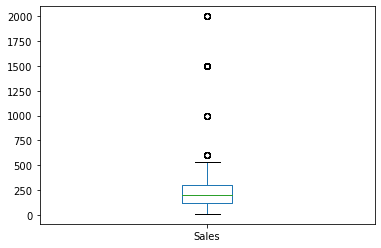

In [73]:
df['Sales'].plot(kind='box')

# Bivariate Analysis

In [74]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                object
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

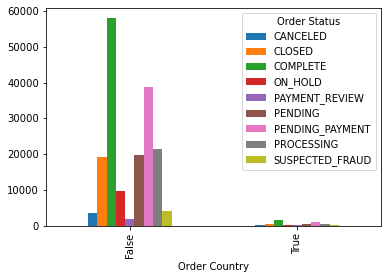

In [75]:
pd.crosstab(df['Order Country']=='India',df['Order Status']).plot(kind='bar')

In [76]:
df['Late_delivery_risk'].unique()

array([0, 1], dtype=object)

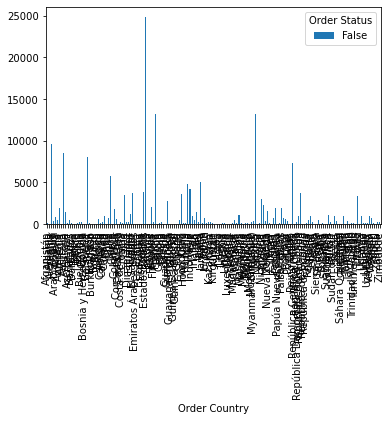

In [77]:
pd.crosstab(df['Order Country'],df['Order Status']=='Suspected_Fraud').plot(kind='bar')

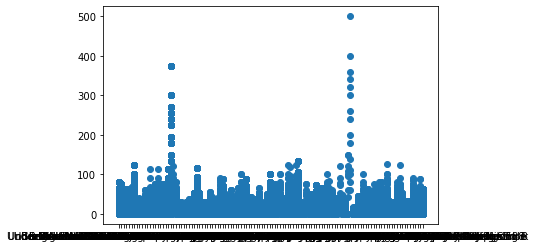

In [78]:
plt.scatter(df['Product Name'],df['Order Item Discount'])

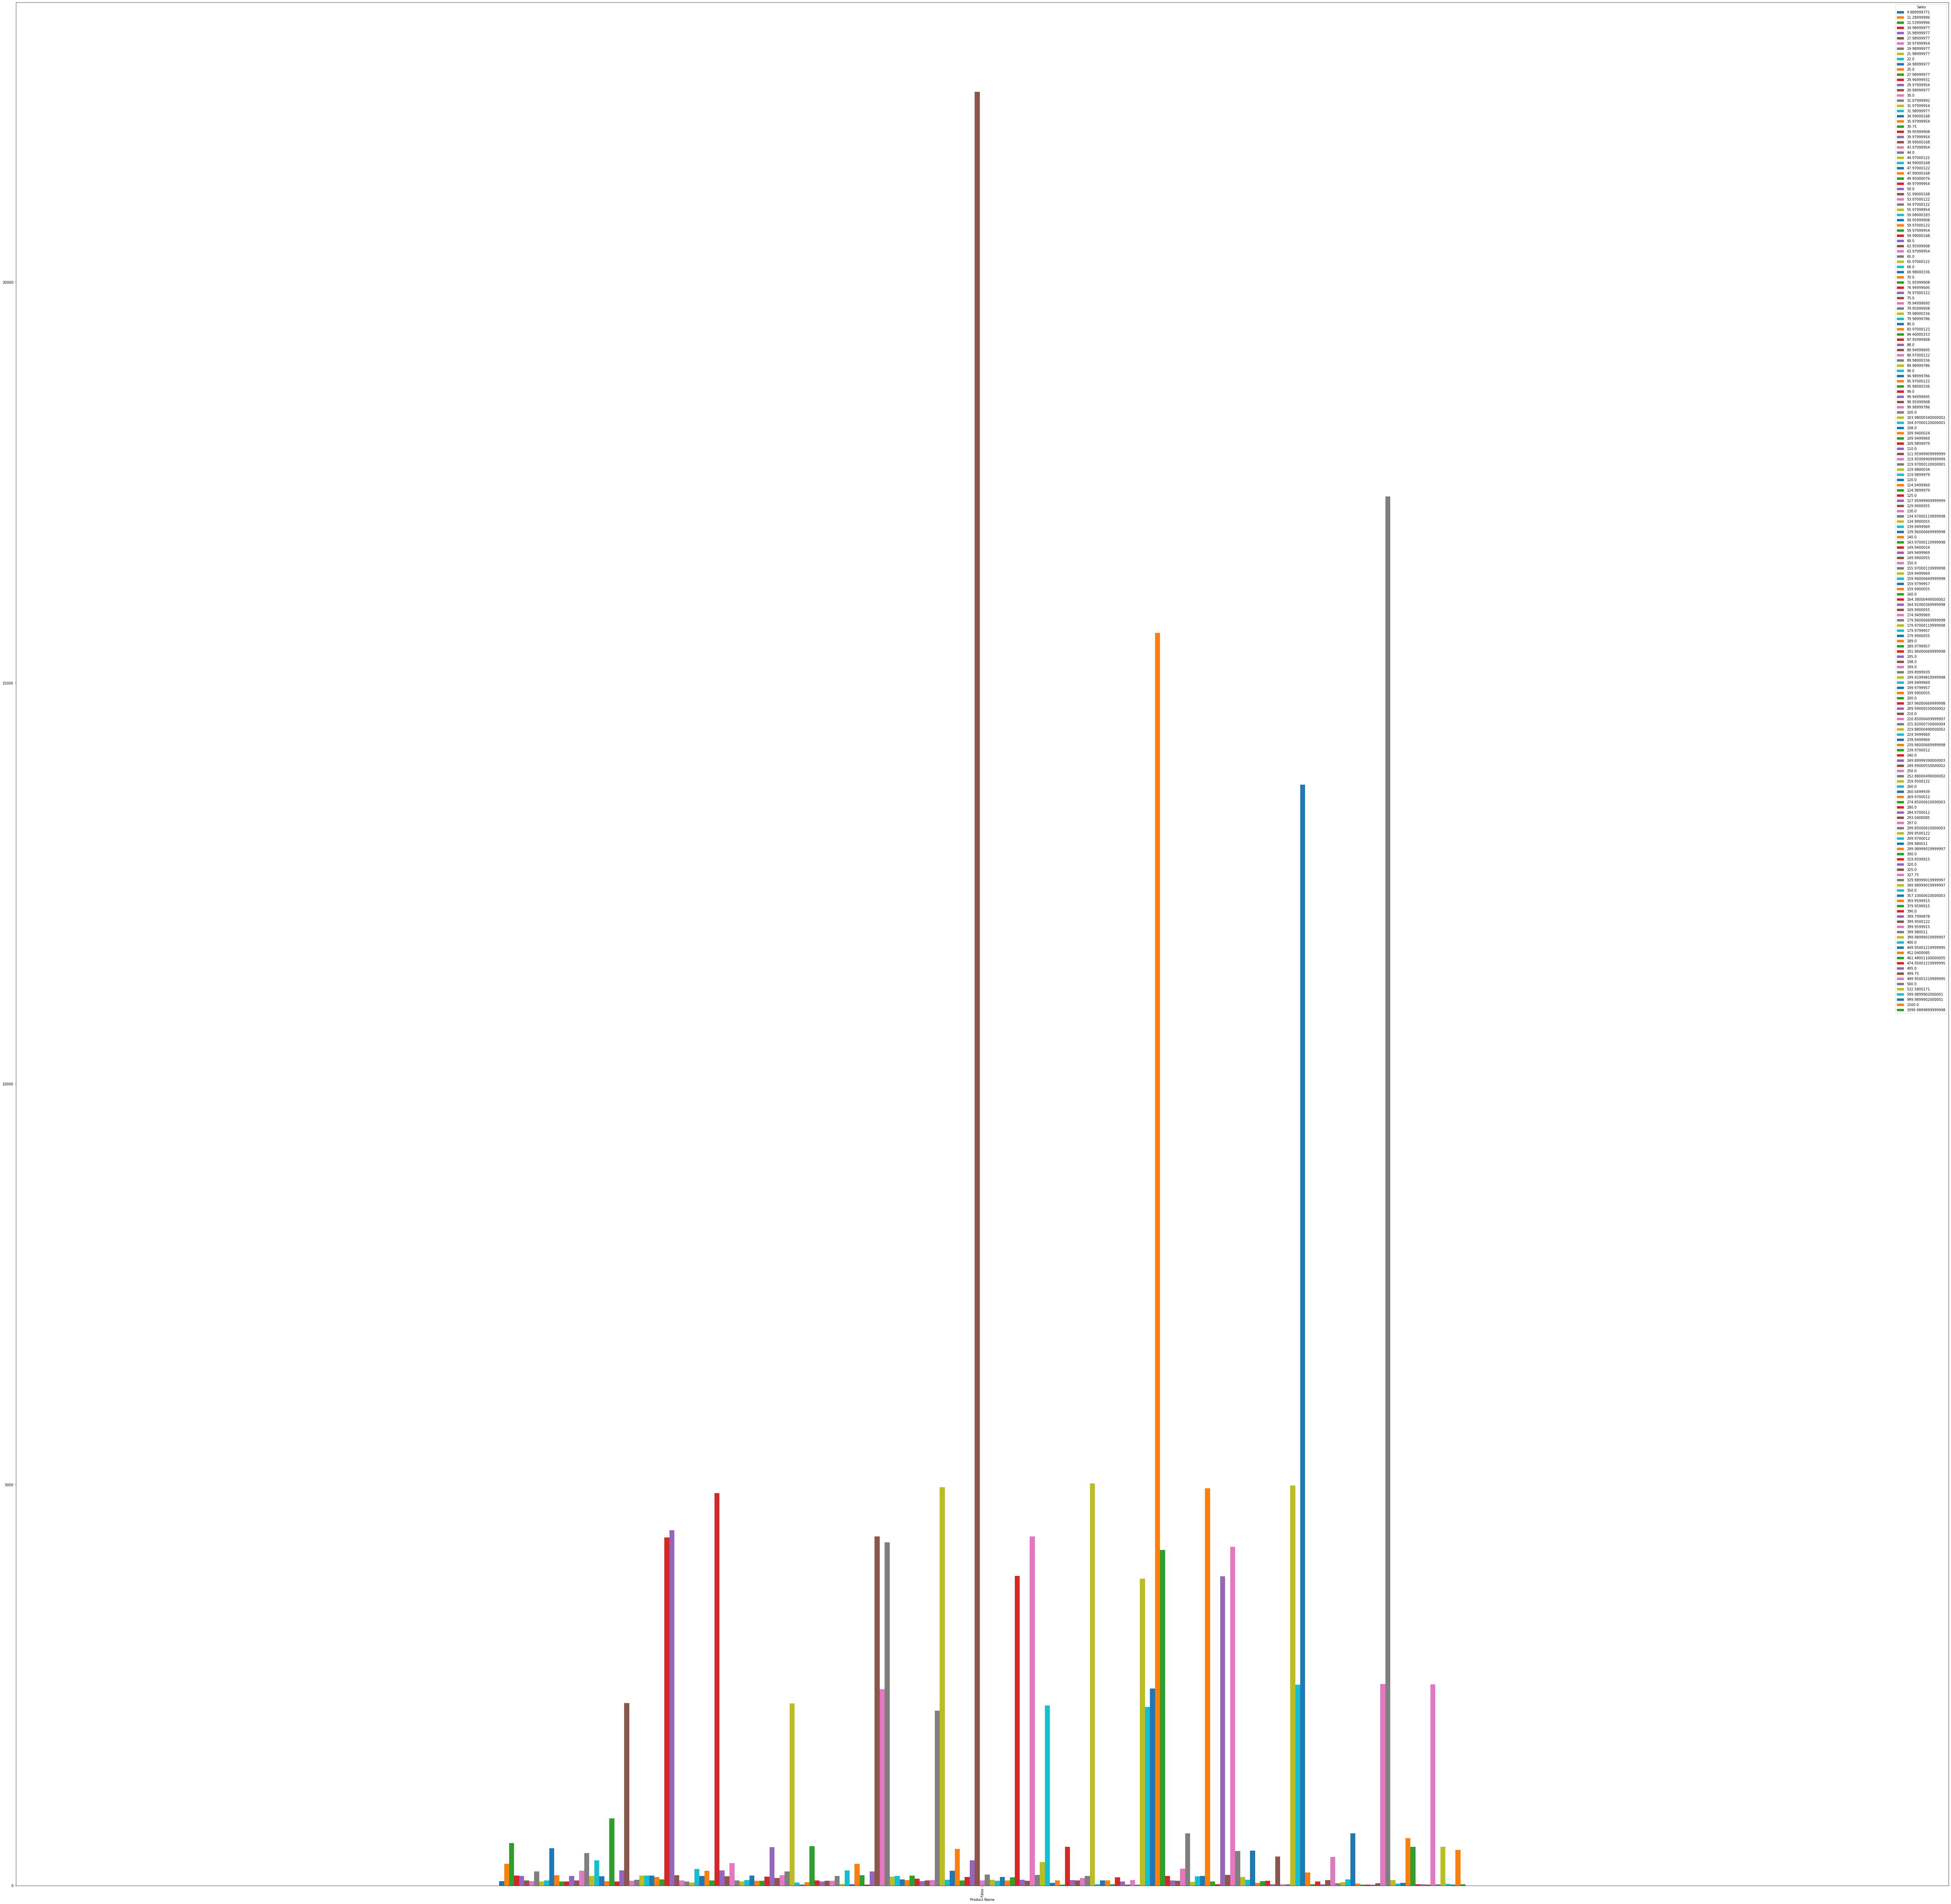

In [79]:
pd.crosstab(df['Product Name']=='Nike',df['Sales']).plot(kind='bar',figsize=(100,100))

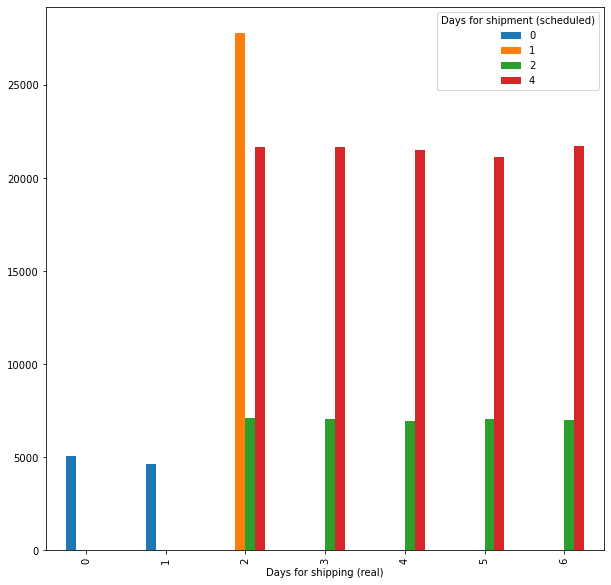

In [80]:
pd.crosstab(df['Days for shipping (real)'],df['Days for shipment (scheduled)']).plot(kind='bar',figsize=(10,10),stacked=False)

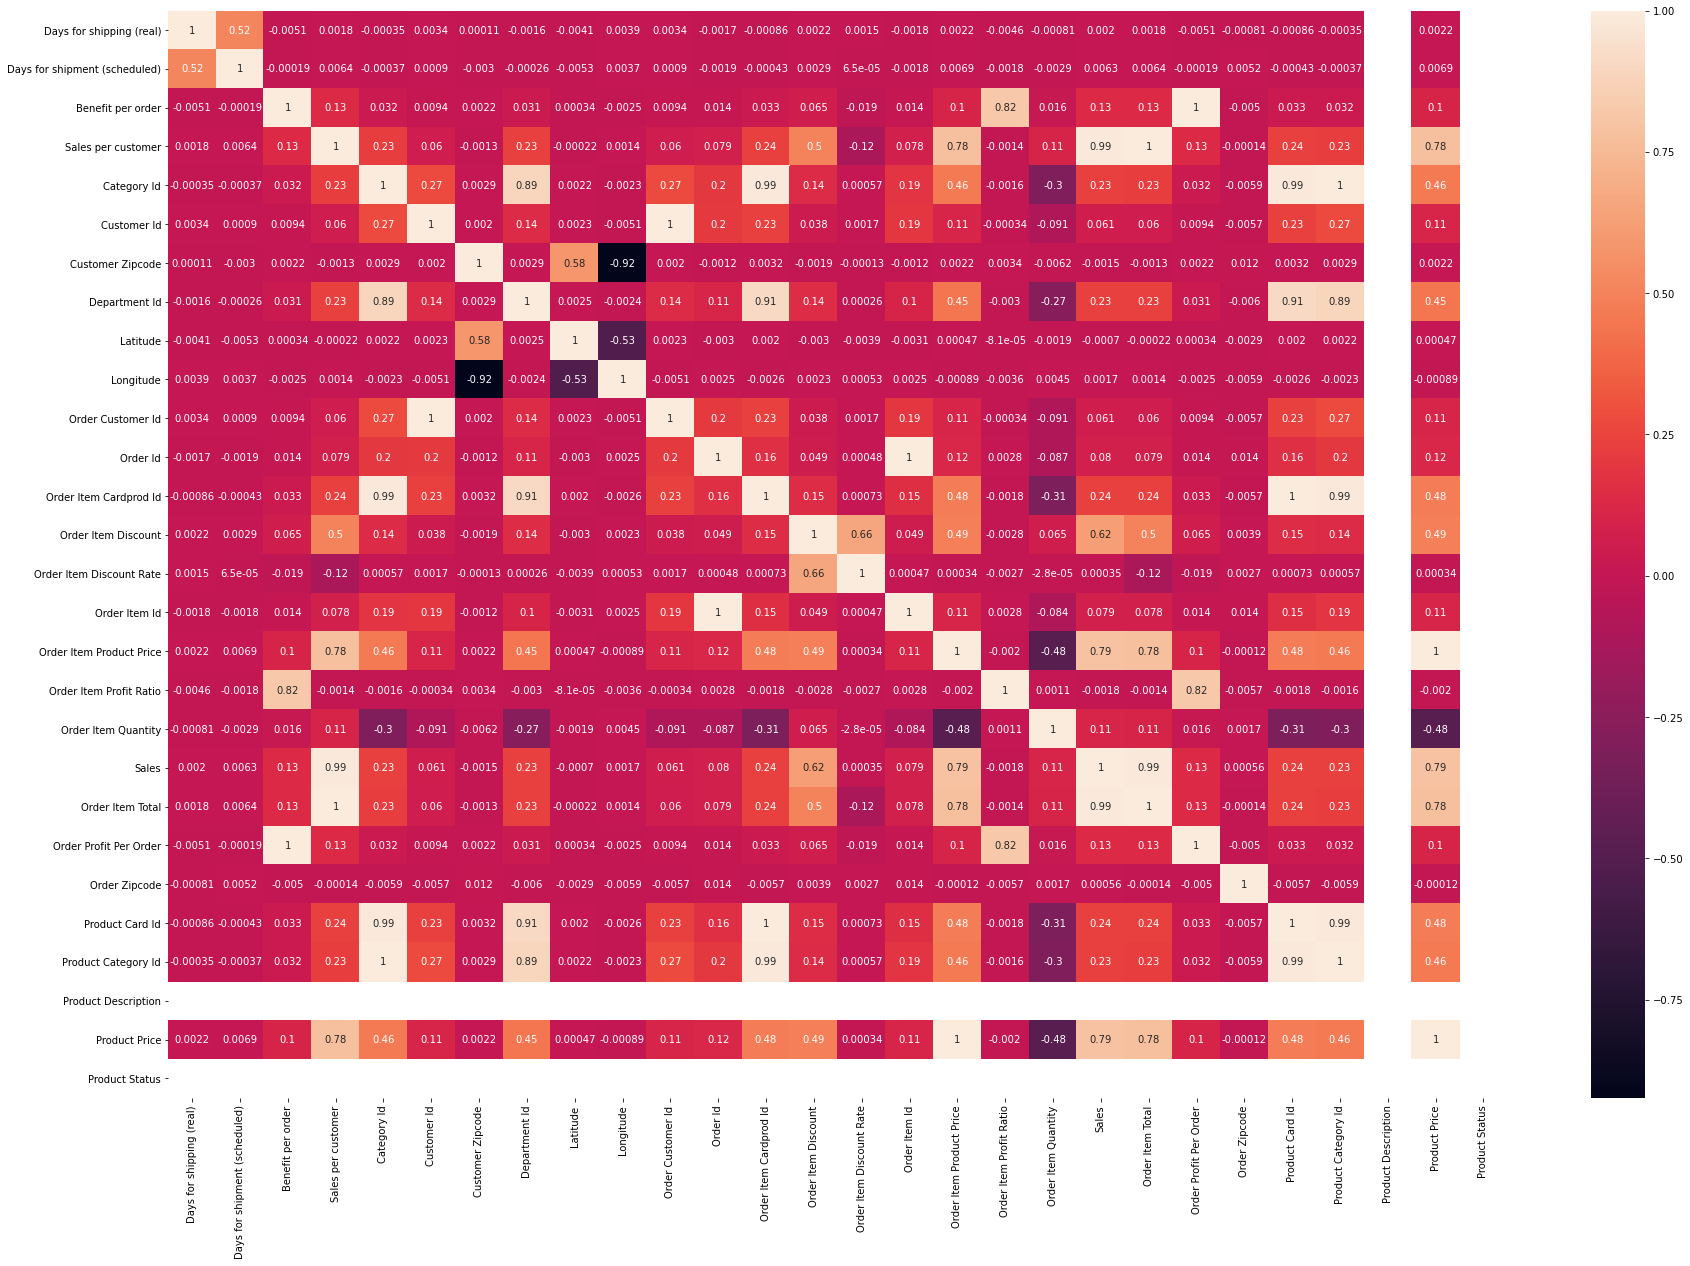

In [81]:
corrmap = df.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df[top].corr(),annot=True)

In [82]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = df[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,134.210007,298.250000,29.500000,0.09,327.75,0.45


In [83]:
df['Late_delivery_risk'].unique()

array([0, 1], dtype=object)

STEP-5 REMOVING OUTLIERS

In [84]:
df['Order Item Discount'].describe()

count    180519.000000
mean         20.664741
std          21.800901
min           0.000000
25%           5.400000
50%          14.000000
75%          29.990000
max         500.000000
Name: Order Item Discount, dtype: float64

In [85]:
q1=df['Order Item Discount'].quantile(0.25)
q3=df['Order Item Discount'].quantile(0.75)
print(q1,q3)
iqr=q3-q1
print(iqr)
low=q1-1.5*iqr
high=q3+1.5*iqr
low,high
df[(df['Order Item Discount']<low)|(df['Order Item Discount']>high)]
df1=df[(df['Order Item Discount']>low)&(df['Order Item Discount']<high)]


5.400000095 29.98999977
24.589999675


# Before Removing Outliers

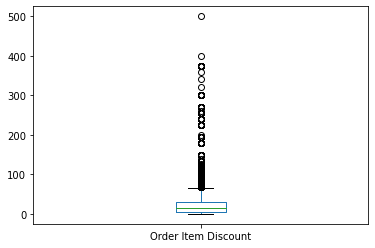

In [86]:
df['Order Item Discount'].plot(kind='box')

# After Removing Outliers

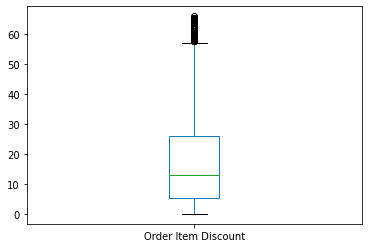

In [87]:
df1['Order Item Discount'].plot(kind='box')

Insights

1) List all the cities and the respective number of pending orders in 'India'?

In [88]:
a=df1.groupby(['Order Country'])
b=a.get_group('India')
d=df1.groupby(['Order Status'])
e=d.get_group('PENDING')
e=e['Order Country']

ans1=pd.concat([b,e],axis=1)
ans1['Order City'].value_counts().head(60)



Delhi            173
Mumbai           162
Pune             149
Bangalore        139
Chennai          128
Kanpur           119
Hyderabad         99
Surat             94
Jaipur            85
Gorakhpur         80
Lucknow           78
Agra              78
Visakhapatnam     77
Nagpur            76
Raipur            73
Ajmer             68
Aurangabad        64
Durgapur          63
Korba             61
Patna             59
Ludhiana          59
Guwahati          57
Jodhpur           56
Coimbatore        55
Thane             55
Mangalore         52
Srinagar          50
Vadodara          49
Indore            46
Solapur           45
Aligarh           44
Rajkot            44
Kalyan            43
Vijayawada        43
Bhavnagar         40
Bhilai            40
Faridabad         38
Bhiwandi          35
Meerut            35
Puducherry        35
Ranchi            34
Pimpri            34
Hubli             33
Bilaspur          33
Guntur            33
Ujjain            33
Dewas             33
Tiruppur     

2) Which country has the most suspected fraud?

In [89]:
f=df1.groupby(['Order Status'])
f=f.get_group('SUSPECTED_FRAUD')
f['Order Country'].value_counts(ascending=False)

Estados Unidos     552
Francia            352
México             304
Alemania           214
Australia          190
                  ... 
Georgia              1
Jamaica              1
Somalia              1
Costa de Marfil      1
Mozambique           1
Name: Order Country, Length: 100, dtype: int64

3) Which product(s) has/have the maximum discount?

In [90]:
g=df1.groupby('Product Name')
h=g['Order Item Discount'].value_counts(ascending=False,sort=False)
h=h.groupby(['Product Name']).sum()
h.sort_values(ascending=False)

Product Name
Perfect Fitness Perfect Rip Deck                 24242
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Pelican Sunstream 100 Kayak                      15500
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       26
Bushnell Pro X7 Jolt Slope Rangefinder               7
SOLE E25 Elliptical                                  6
Bowflex SelectTech 1090 Dumbbells                    4
SOLE E35 Elliptical                                  1
Name: Order Item Discount, Length: 118, dtype: int64

In [91]:
df1['Order Item Discount'].unique()

array([13.10999966, 16.38999939, 18.03000069, 22.94000053, 29.5       ,
       32.77999878, 39.33000183, 42.61000061, 49.15999985, 52.43999863,
       55.72000122, 59.        , 65.55000305,  0.        ,  3.27999997,
        6.55999994,  9.82999992,  4.80000019,  0.80000001,  4.        ,
        9.        , 13.        , 18.        , 15.30000019, 19.79000092,
        2.4000001 , 24.        , 36.        ,  6.        ,  1.98000002,
       16.30999947, 30.        ,  3.5999999 , 12.60000038, 16.20000076,
       10.5       , 12.        , 37.5       , 10.56000042,  1.79999995,
        9.89999962, 27.        ,  7.5       , 19.5       , 25.5       ,
       20.38999939, 10.        , 11.        , 13.75      , 13.5       ,
       25.        , 25.98999977, 32.5       , 29.98999977, 31.98999977,
       42.5       , 50.        , 49.99000168, 62.5       ,  6.4000001 ,
       53.99000168, 25.48999977, 15.        ,  5.        , 20.        ,
        3.        , 16.5       ,  2.5999999 , 11.69999981, 10.80

5) How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)?

In [92]:
k=df1[df1['Days for shipping (real)']>df1['Days for shipment (scheduled)']]
k=k['Order Status']=='COMPLETE'

k.value_counts()

False    66343
True     32724
Name: Order Status, dtype: int64

In [93]:
df1.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172982 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           172982 non-null  object 
 1   Days for shipping (real)       172982 non-null  int64  
 2   Days for shipment (scheduled)  172982 non-null  int64  
 3   Benefit per order              172982 non-null  float64
 4   Sales per customer             172982 non-null  float64
 5   Delivery Status                172982 non-null  object 
 6   Late_delivery_risk             172982 non-null  object 
 7   Category Id                    172982 non-null  int64  
 8   Category Name                  172982 non-null  object 
 9   Customer City                  172982 non-null  object 
 10  Customer Country               172982 non-null  object 
 11  Customer Email                 172982 non-null  object 
 12  Customer Fname                

# Feature Engineering

In [95]:
#Converting categorical features that represent date and time to datetime datatype.
df1['order_date'] = pd.to_datetime(df1['order date (DateOrders)'])
df1['shipping_date']=pd.to_datetime(df1['shipping date (DateOrders)'])
df1['shipping_date']

0        2018-02-03 22:56:00
1        2018-01-18 12:27:00
2        2018-01-17 12:06:00
3        2018-01-16 11:45:00
4        2018-01-15 11:24:00
                 ...        
180514   2016-01-20 03:40:00
180515   2016-01-19 01:34:00
180516   2016-01-20 21:00:00
180517   2016-01-18 20:18:00
180518   2016-01-19 18:54:00
Name: shipping_date, Length: 172982, dtype: datetime64[ns]

In [96]:
df1['order_year'] = pd.DatetimeIndex(df1['order_date']).year
df1['order_month'] = pd.DatetimeIndex(df1['order_date']).month
df1['order_day'] = pd.DatetimeIndex(df1['order_date']).day
df1['shipping_year'] = pd.DatetimeIndex(df1['shipping_date']).year
df1['shipping_month'] = pd.DatetimeIndex(df1['shipping_date']).month
df1['shipping_day'] = pd.DatetimeIndex(df1['shipping_date']).day

# Feature Selection

In [97]:
features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']
len(features)

21

In [98]:
data= df1[features]

In [99]:
#One-Hot encoding categotical variables in the data
data = pd.get_dummies(data)
data.shape


(172982, 3819)

# Building Model

In [100]:
# Splitting independent and dependent features from the processsed dataset
x = data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = data[['Days for shipping (real)','Days for shipment (scheduled)']]


In [101]:
x.shape,y.shape

((172982, 3817), (172982, 2))

In [102]:
# Splitting data into train and test. Alloting 25% data for testing
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

In [103]:
# The hyper-parameters used are default hyper-parameters
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)


# Model Evaluation

In [104]:
#Function for estimating r2_score, mean_squared_error, mean_absolute_error
def metrics(y_test,pred):
    a =r2_score(y_test,pred)
    b =mean_squared_error(y_test,pred)
    c =mean_absolute_error(y_test,pred)
    print('The r-squared score of the model is ',a)
    print('The mean squared error is',b)
    print('The mean accuracy score is',c)


In [105]:
metrics(y_test,pred)

The r-squared score of the model is  0.9916828141603571
The mean squared error is 0.02190941411105009
The mean accuracy score is 0.01644651270341359


# Exporting Model

In [106]:
import pickle

In [109]:
filename = 'Shipping_duration_estimator.pkl'
pickle.dump(model,open(filename,'wb'))